# TSF Assignment #3 - Data Visualization

Author: Rahul Vanjeri

Internship Batch: June '21

In [27]:
#import required modules 
!pip install geopandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np , pandas as pd, matplotlib.pyplot as plt, geopandas as gpd
import seaborn as sns
!pip install gdown
!gdown https://drive.google.com/uc?id=1lV7is1B566UQPYzzY8R2ZmOritTW299S
sns.set()

     |████████████████████████████████| 1.0MB 6.6MB/s 
     |████████████████████████████████| 6.6MB 16.5MB/s 
     |████████████████████████████████| 15.4MB 231kB/s 
Downloading...
From: https://drive.google.com/uc?id=1lV7is1B566UQPYzzY8R2ZmOritTW299S
To: /content/SampleSuperstore.csv
100% 1.11M/1.11M [00:00<00:00, 70.2MB/s]


In [3]:
df = pd.read_csv('./SampleSuperstore.csv')

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
cols = df.nunique()[df.nunique() <= 49].index
cols

Index(['Ship Mode', 'Segment', 'Country', 'State', 'Region', 'Category',
       'Sub-Category', 'Quantity', 'Discount'],
      dtype='object')

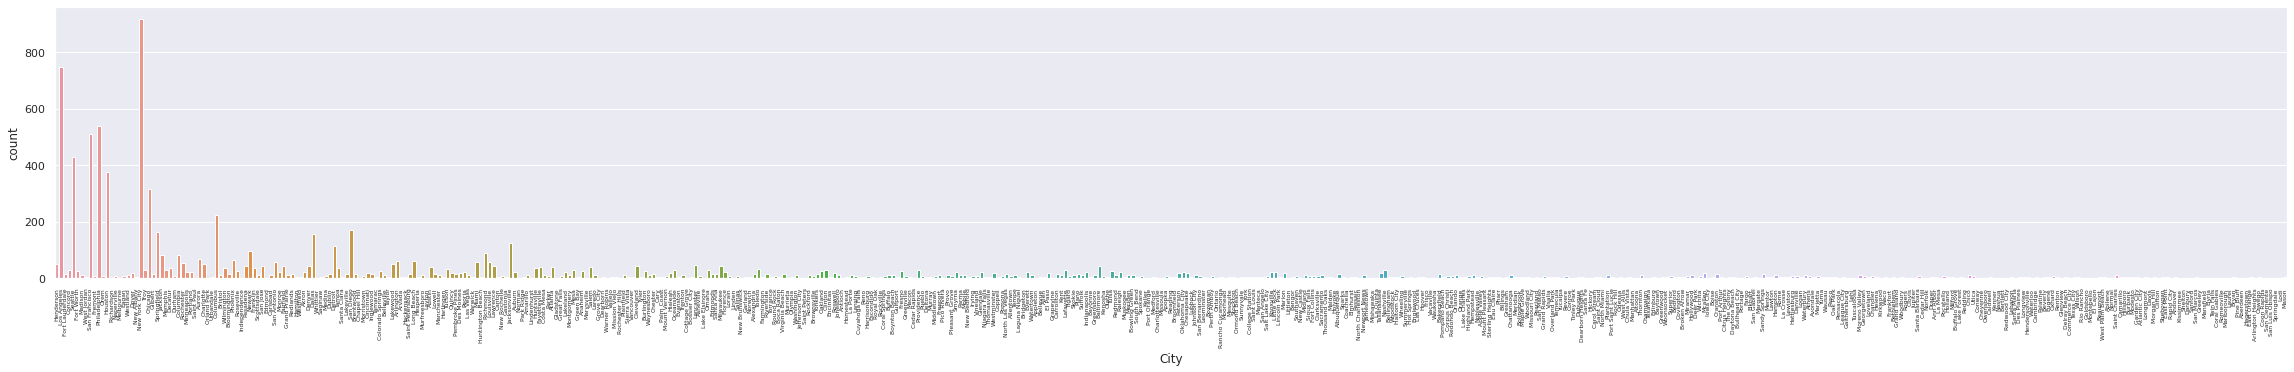

In [24]:
plt.figure(figsize=(40,5))
sns.countplot(df['City'])
plt.xticks(rotation = 90, fontsize = 6)
plt.show()

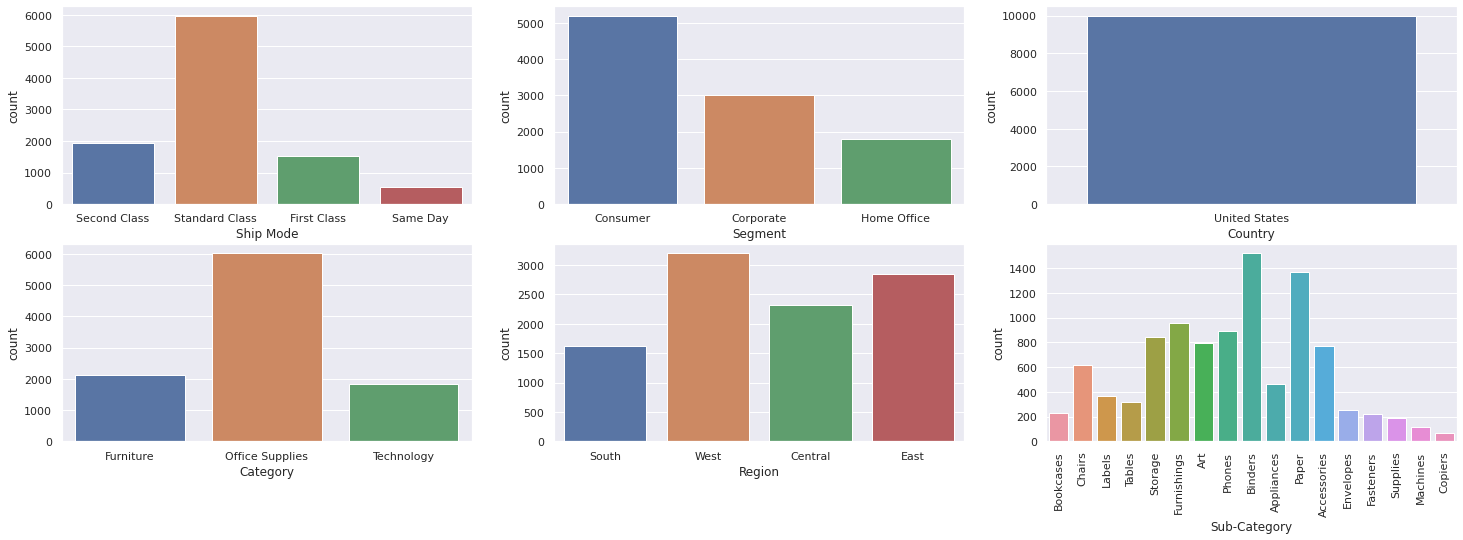

In [25]:
fig, axes = plt.subplots(2,3, figsize = (25,8))
sns.countplot( df['Ship Mode'], ax = axes[0,0])
sns.countplot( df['Segment'], ax = axes[0,1])
sns.countplot( df['Country'], ax = axes[0,2])
sns.countplot( df['Region'], ax = axes[1,1])
sns.countplot( df['Category'], ax = axes[1,0])
sns.countplot( df['Sub-Category'], ax = axes[1,2])
plt.xticks(rotation=90)
fig.show()

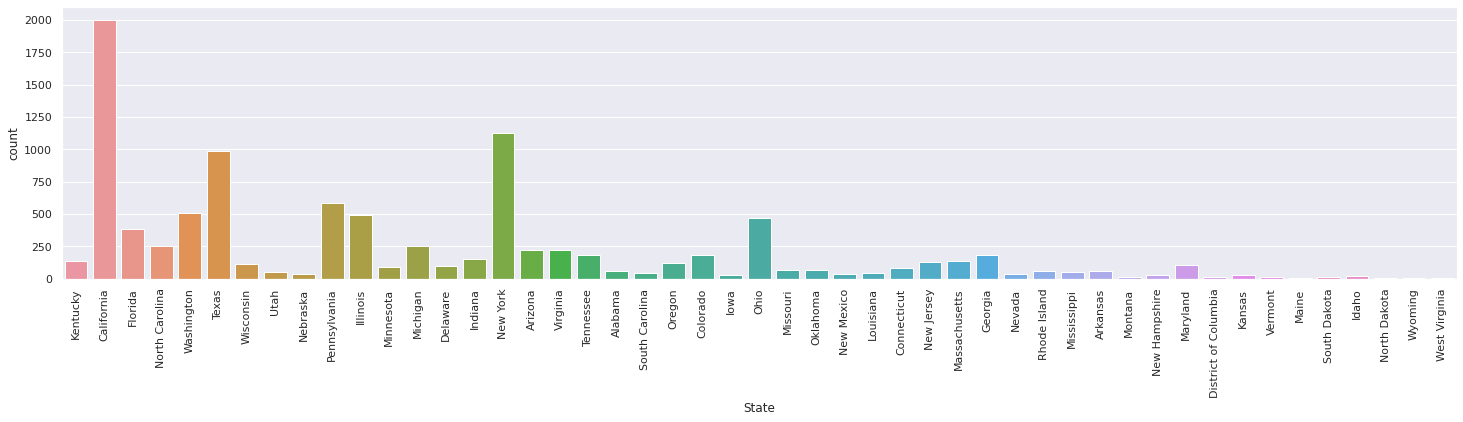

In [9]:
plt.figure(figsize=(25,5))
sns.countplot(df['State'])
plt.xticks(rotation = 90)
plt.show()

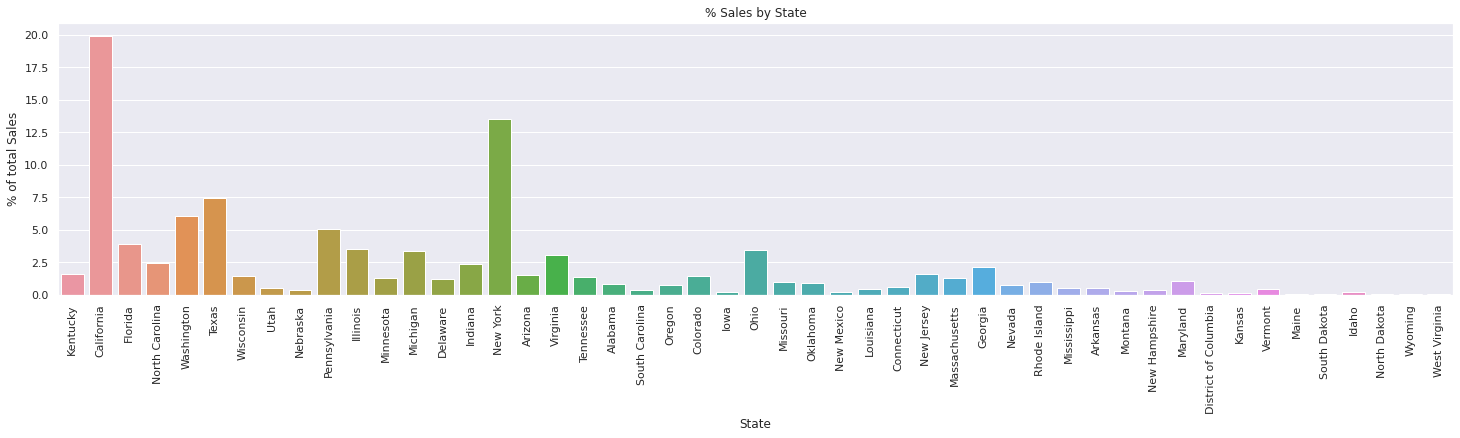

In [10]:
states = df['State'].unique()
sales_by_state = np.array([df['Sales'][df['State']==i].sum() / df['Sales'].sum() for i in states])
plt.figure(figsize = (25,5))
sns.barplot(x = states, y = sales_by_state * 100)
plt.xticks(rotation = 90)
plt.title("% Sales by State")
plt.xlabel("State")
plt.ylabel('% of total Sales')
plt.show()

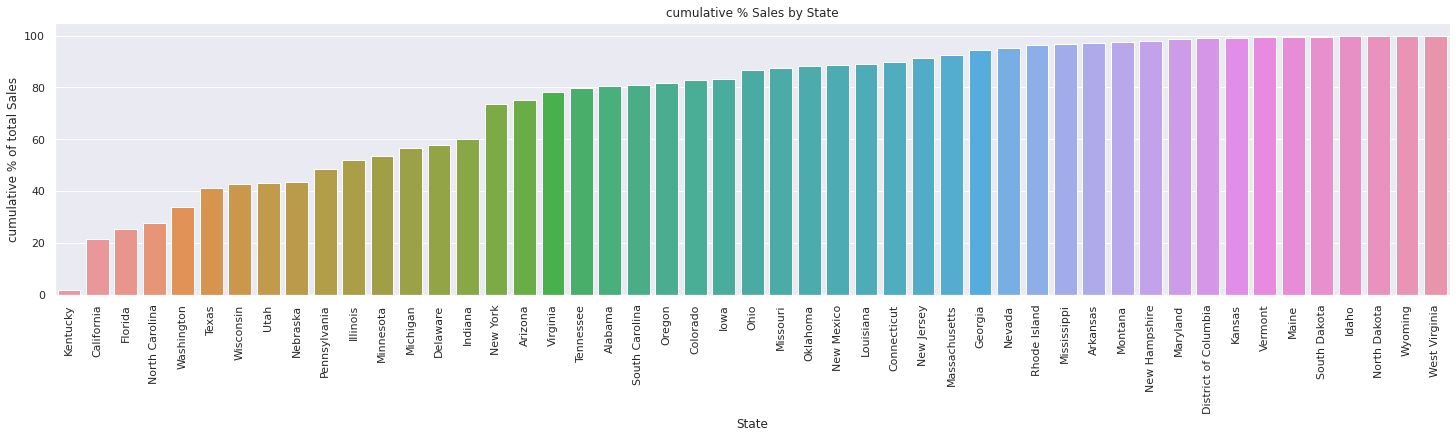

In [11]:
plt.figure(figsize = (25,5))
sns.barplot(x = states, y = np.cumsum(sales_by_state * 100))
plt.xticks(rotation = 90)
plt.title("cumulative % Sales by State")
plt.xlabel("State")
plt.ylabel('cumulative % of total Sales')
plt.show()

In [12]:
print('These States Account for 80% sales: ')
print(states[np.cumsum( sales_by_state * 100)<=80])

These States Account for 80% sales: 
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee']


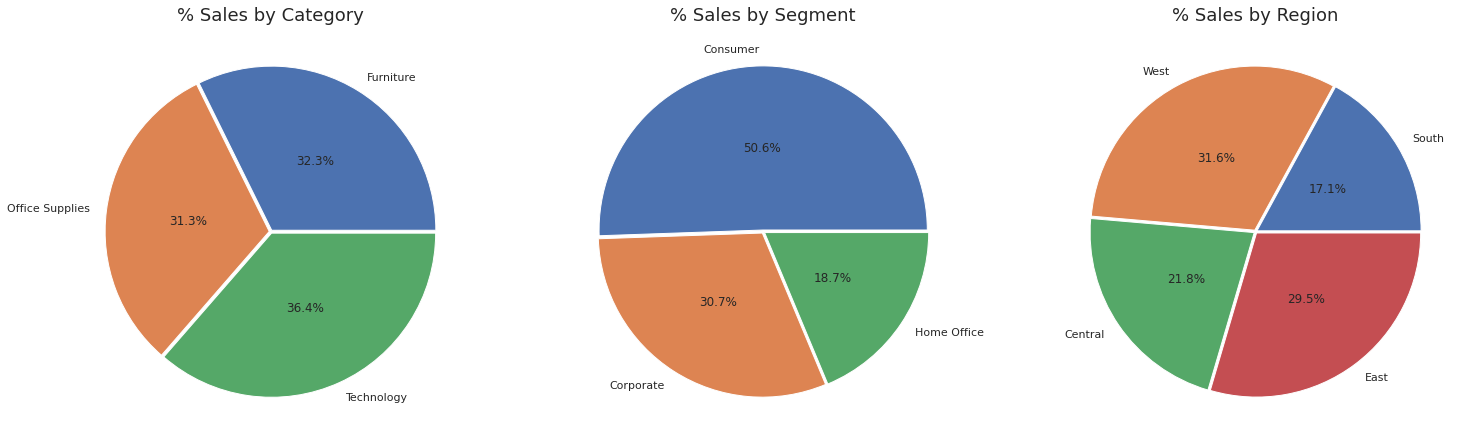

In [13]:
categories = df['Category'].unique()
sales_by_cat = np.array([df['Sales'][df['Category']==i].sum() / df['Sales'].sum() for i in categories])
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (25,8))
ax0.pie(x=sales_by_cat, autopct="%.1f%%", explode=[0.01]*len(sales_by_cat), labels=categories, pctdistance=0.5)
ax0.title.set_text('% Sales by Category')
ax0.title.set_size(18)
segments = df['Segment'].unique()
sales_by_seg = np.array([df['Sales'][df['Segment']==i].sum() / df['Sales'].sum() for i in segments])
ax1.pie(x=sales_by_seg, autopct="%.1f%%", explode=[0.01]*len(sales_by_seg), labels=segments, pctdistance=0.5)
ax1.title.set_text('% Sales by Segment')
ax1.title.set_size(18)

region = df['Region'].unique()
sales_by_reg = np.array([df['Sales'][df['Region']==i].sum() / df['Sales'].sum() for i in region])
ax2.pie(x=sales_by_reg, autopct="%.1f%%", explode=[0.01]*len(sales_by_reg), labels=region, pctdistance=0.5)
ax2.title.set_text('% Sales by Region')
ax2.title.set_size(18)

plt.show()

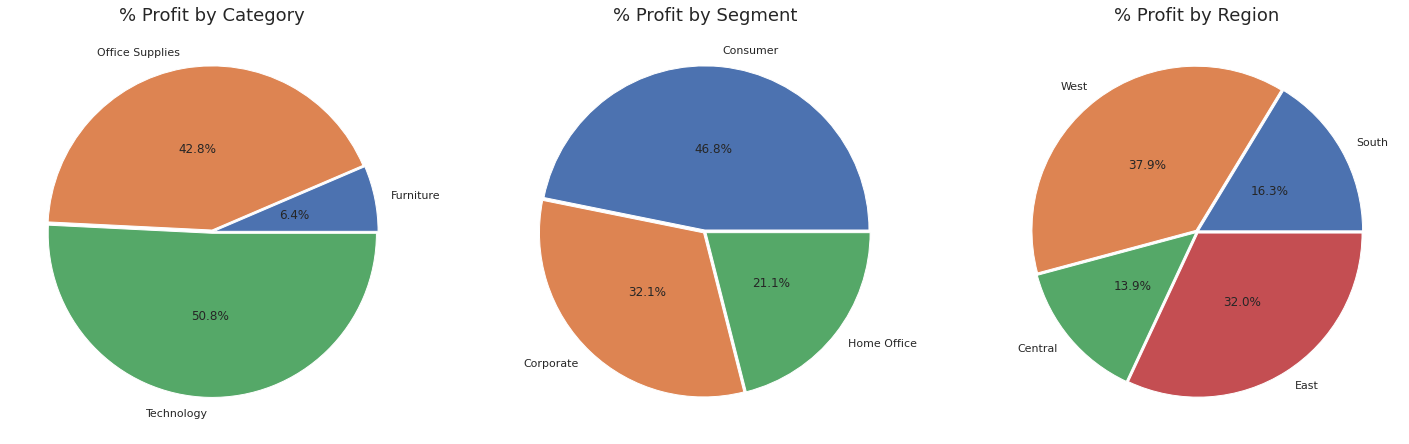

In [14]:
categories = df['Category'].unique()
sales_by_cat = np.array([df['Profit'][df['Category']==i].sum() / df['Profit'].sum() for i in categories])
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (25,8))
ax0.pie(x=sales_by_cat, autopct="%.1f%%", explode=[0.01]*len(sales_by_cat), labels=categories, pctdistance=0.5)
ax0.title.set_text('% Profit by Category')
ax0.title.set_size(18)
segments = df['Segment'].unique()
sales_by_seg = np.array([df['Profit'][df['Segment']==i].sum() / df['Profit'].sum() for i in segments])
ax1.pie(x=sales_by_seg, autopct="%.1f%%", explode=[0.01]*len(sales_by_seg), labels=segments, pctdistance=0.5)
ax1.title.set_text('% Profit by Segment')
ax1.title.set_size(18)

region = df['Region'].unique()
sales_by_reg = np.array([df['Profit'][df['Region']==i].sum() / df['Profit'].sum() for i in region])
ax2.pie(x=sales_by_reg, autopct="%.1f%%", explode=[0.01]*len(sales_by_reg), labels=region, pctdistance=0.5)
ax2.title.set_text('% Profit by Region')
ax2.title.set_size(18)


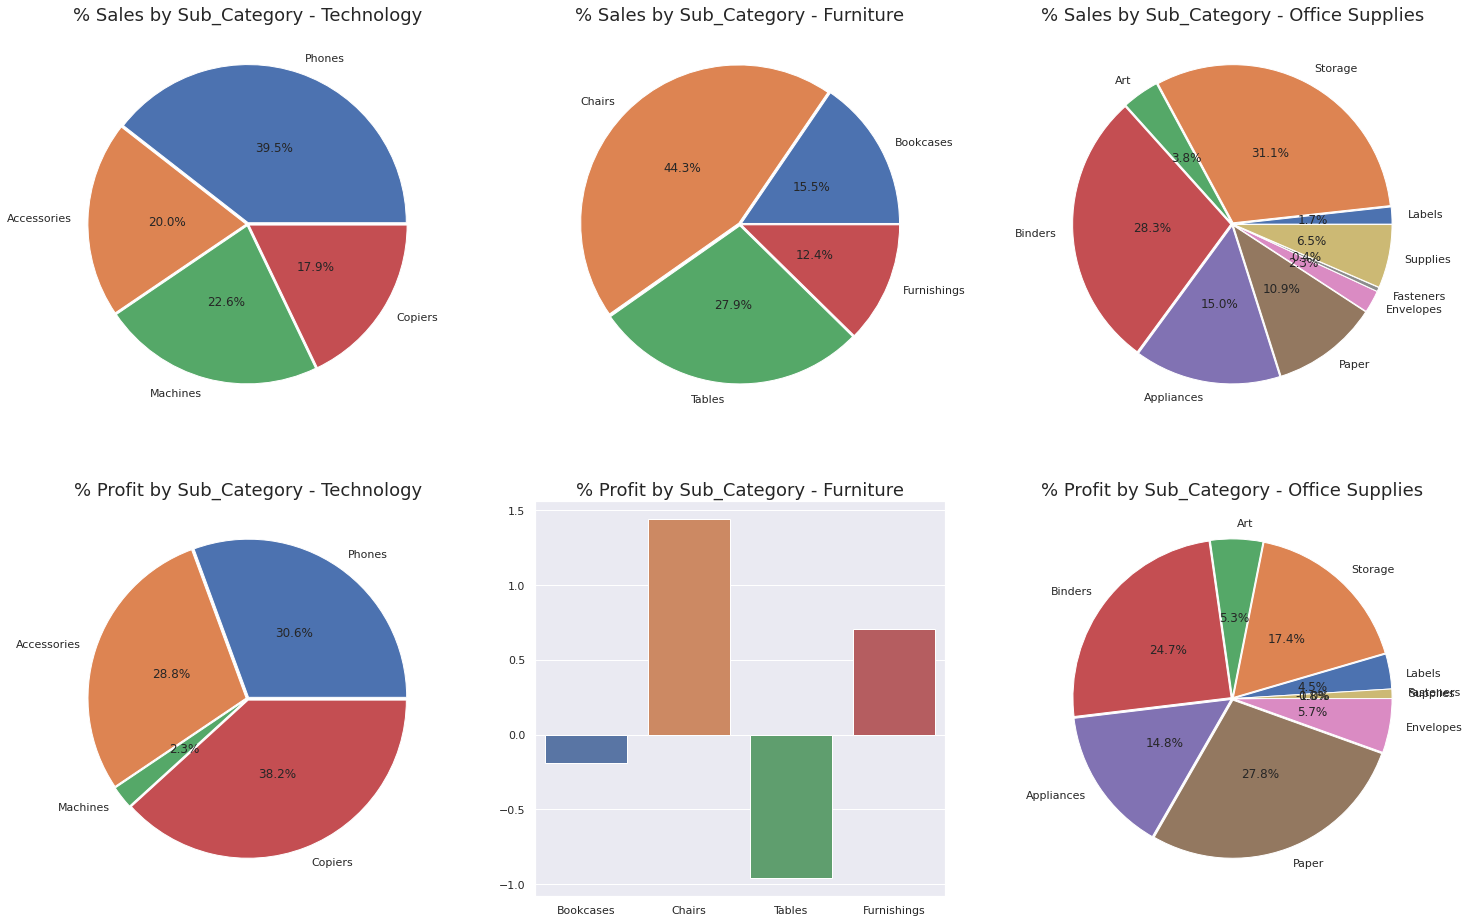

In [15]:
subcategories = df['Sub-Category'][df['Category']=='Technology'].unique()
sales_by_subcat = np.array([df['Sales'][df['Sub-Category']==i].sum() / df['Sales'][df['Category']=='Technology'].sum() for i in subcategories])
fig, (A,B) = plt.subplots(2,3, figsize = (25,16))
(ax0, ax1, ax2) = A
(ax3, ax4, ax5) = B
ax0.pie(x=sales_by_subcat, autopct="%.1f%%", explode=[0.01]*len(sales_by_subcat), labels=subcategories, pctdistance=0.5)
ax0.title.set_text('% Sales by Sub_Category - Technology')
ax0.title.set_size(18)

subcategories = df['Sub-Category'][df['Category']=='Furniture'].unique()
sales_by_subcat = np.array([df['Sales'][df['Sub-Category']==i].sum() / df['Sales'][df['Category']=='Furniture'].sum() for i in subcategories])
ax1.pie(x=sales_by_subcat, autopct="%.1f%%", explode=[0.01]*len(sales_by_subcat), labels=subcategories, pctdistance=0.5)
ax1.title.set_text('% Sales by Sub_Category - Furniture')
ax1.title.set_size(18)

subcategories = df['Sub-Category'][df['Category']=='Office Supplies'].unique()
sales_by_subcat = np.array([df['Sales'][df['Sub-Category']==i].sum() / df['Sales'][df['Category']=='Office Supplies'].sum() for i in subcategories])
ax2.pie(x=sales_by_subcat, autopct="%.1f%%", explode=[0.01]*len(sales_by_subcat), labels=subcategories, pctdistance=0.5)
ax2.title.set_text('% Sales by Sub_Category - Office Supplies')
ax2.title.set_size(18)



subcategories = df['Sub-Category'][df['Category']=='Technology'].unique()
sales_by_subcat = np.array([df['Profit'][df['Sub-Category']==i].sum() / df['Profit'][df['Category']=='Technology'].sum() for i in subcategories])
ax3.pie(x=sales_by_subcat, autopct="%.1f%%", explode=[0.01]*len(sales_by_subcat), labels=subcategories, pctdistance=0.5)
ax3.title.set_text('% Profit by Sub_Category - Technology')
ax3.title.set_size(18)

subcategories = df['Sub-Category'][df['Category']=='Furniture'].unique()
sales_by_subcat = np.array([df['Profit'][df['Sub-Category']==i].sum() / df['Profit'][df['Category']=='Furniture'].sum() for i in subcategories])
sns.barplot(ax = ax4 , y=sales_by_subcat, x=subcategories)
ax4.title.set_text('% Profit by Sub_Category - Furniture')
ax4.title.set_size(18)

subcategories = df['Sub-Category'][df['Category']=='Office Supplies'].unique()
sales_by_subcat = np.array([df['Profit'][df['Sub-Category']==i].sum() / df['Profit'][df['Category']=='Office Supplies'].sum() for i in subcategories])
ax5.pie(x=sales_by_subcat, autopct="%.1f%%", explode=[0.01]*len(sales_by_subcat), labels=subcategories, pctdistance=0.5)
ax5.title.set_text('% Profit by Sub_Category - Office Supplies')
ax5.title.set_size(18)

Furniture Category seems to be incurring loses

In [16]:
df['undiscounted_sales'] = df['Sales'] /(1-df['Discount'])
df['undiscounted_profit'] = (df['undiscounted_sales'] - df['Sales']) + df['Profit']

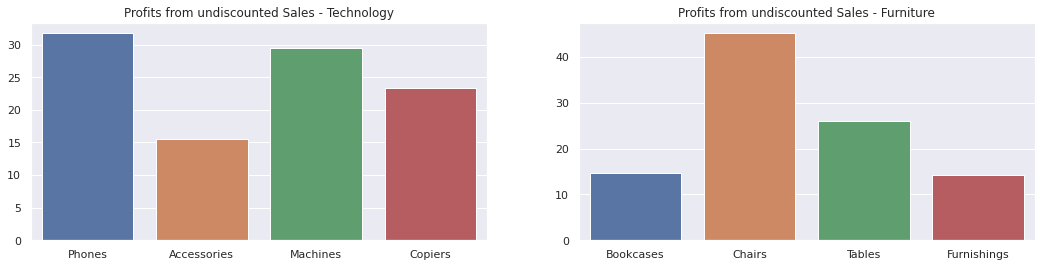

In [17]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
subcategories = df['Sub-Category'][df['Category']=='Furniture'].unique()
sales_by_subcat = np.array([df['undiscounted_profit'][df['Sub-Category']==i].sum() / df['undiscounted_profit'][df['Category']=='Furniture'].sum() for i in subcategories])
sns.barplot(ax=ax[1], y=sales_by_subcat*100, x=subcategories)
ax[1].title.set_text('Profits from undiscounted Sales - Furniture')
subcategories = df['Sub-Category'][df['Category']=='Technology'].unique()
sales_by_subcat = np.array([df['undiscounted_profit'][df['Sub-Category']==i].sum() / df['undiscounted_profit'][df['Category']=='Technology'].sum() for i in subcategories])
sns.barplot(ax=ax[0], y=sales_by_subcat*100, x=subcategories)
ax[0].title.set_text('Profits from undiscounted Sales - Technology')
fig.show()

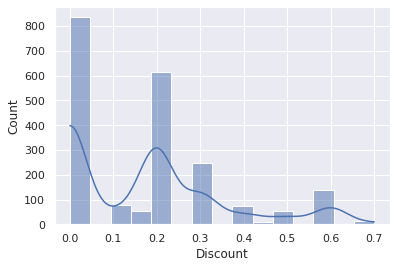

In [21]:
sns.histplot(df['Discount'][df['Category']=='Furniture'], kde=True)
plt.show()

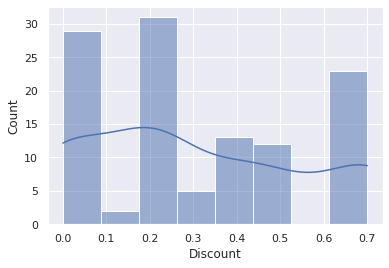

In [22]:
sns.histplot(df['Discount'][df['Sub-Category']=='Machines'], kde=True)
plt.show()

Observations: 

1) By reducing the Discount offered on Sub-Category machines, the profitability rises

2) Heavy discounts offered on Category Furniture are the cause of losses incurred in that category, thus reducing discounts offered in furniture can improve the profits.
